## Problem 1

The aim of this exercise is to verify, for some specific examples, that i\) **OLS estimators are consistent** and ii\) **asymptotically normal**, and that iii\) **our F statistics follow F distributions in large samples**
without assuming that the error terms u are normally distributed. To do so, we will perform Monte Carlo simulations in Stata.

In the following we assume that the population model is this regression

 $$y=\beta_0+\beta_1x_1+\beta_2x_2+u_i$$

and we also assume that $x$ and $u$ are independent and $x_1 ∼ Uniform(0, 1), x_2 ∼ Binomial(1, 0.3)$ and $u + 1 ∼ \chi^2(1)$.

1. Generate a dataset of 1000 observations that contains $x_1 ∼ Uniform(0, 1)$ and $u + 1 ∼ χ2(1)$. Plot both $x_1$ and $u$.

In [45]:
#Calling packages
using Distributions, Plots, DataFrames, Statistics, GLM, StatsModels

In [ ]:
# Generate the two random variables 
x_1 = rand(1000)
chi_vals = rand(Chisq(1), 1000)
u = chi_vals .- 1

1000-element Vector{Float64}:
 -0.9857788035495172
 -0.9283461067420801
 -0.986469214066716
 -0.5240445306161148
 -0.9833671385557907
 -0.6013653085632267
 -0.996058422294962
  2.0718819172479583
 -0.26070230910200076
 -0.6714900040104197
  ⋮
  0.05778571710003311
 -0.9849929333969082
  0.047222124611932204
  3.0319265238052564
 -0.994678217039892
 -0.9223952366661644
  2.527419996921605
  0.09320233241064968
  1.6338110476290102

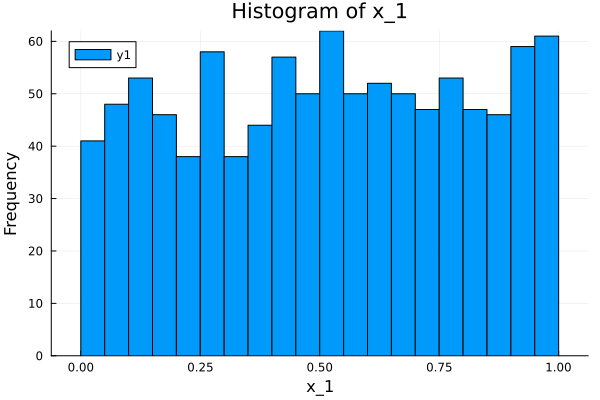

In [3]:
# Plot the histogram of x_1
histogram(x_1, bins=30, title="Histogram of x_1", xlabel="x_1", ylabel="Frequency")

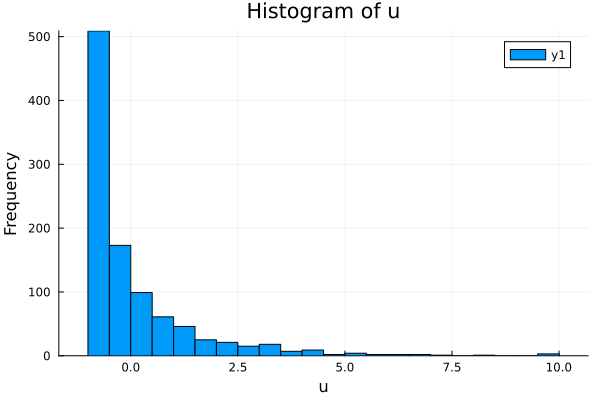

In [4]:
# Plot the histogram of u
histogram(u, bins=30, title="Histogram of u", xlabel="u", ylabel="Frequency")

2. Now that you know how to draw random variables, clear all data and follow these steps:

    (a) Define a program (in Stata) or a function (in other languages) that generates $u + 1 ∼ \chi^2(1)$ over $N = 5$ observations and retrieves the mean and standard deviation of the generated sample

In [22]:
# Define the function to generate the random variables
function f(N)
    u_plus_1= rand(Chisq(1), N)
    u= u_plus_1 .- 1
    return mean(u), std(u)
end

f (generic function with 1 method)

In [24]:
# Run the function with 5 observations
df_5 = f(5)
first_element = df_5[1]
second_element = df_5[2]
println("The mean of u with 5 observations is ", first_element, " and the standard deviation is ", second_element)

The mean of u with 5 observations is 0.40566513020183714 and the standard deviation is 1.0968308375747042


    (b) Simulate the program 10 000 times. you should obtain a dataset with a variable for the mean and one for the standard deviation

In [7]:
# Run the function for 10000 times
n=10000
mean_vals = zeros(n)
sd_vals = zeros(n)
for i in 1:n
    mean_vals[i], sd_vals[i] = f(5)
end

In [8]:
# Generate a new dataframe using the mean and standard deviation values
df = DataFrame(mean_vals = mean_vals, sd_vals = sd_vals)
# Display the first 5 rows of the dataframe to check
first(df, 5)

Row,mean_vals,sd_vals
,Float64,Float64
1,-0.950423,0.0378866
2,-0.919739,0.0664277
3,-0.100481,1.67028
4,-0.72371,0.155112
5,0.294887,1.34658


(c) Summarize and plot a histogram of the mean variable

In [9]:
# Summarize the mean variable
mean_summary = describe(select(df, [:mean_vals]))

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,mean_vals,-0.00110848,-0.990923,-0.125059,3.86975,0,Float64


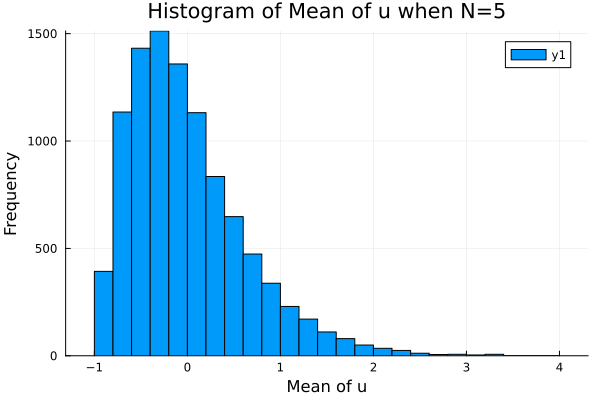

In [10]:
# Plot the histogram of the mean variable
histogram(mean_vals, bins=30, title="Histogram of Mean of u when N=5", xlabel="Mean of u", ylabel="Frequency")

3. Repeat the simulation in 2) but for different programs with $N = 10, 100$ and $ 1000$. Calculate the
summary statistics of each of the mean variables obtained. What do you observe?

In [25]:
# For N=10 
mean_vals = zeros(n)
sd_vals = zeros(n)
for i in 1:n
    mean_vals[i], sd_vals[i] = f(10)
end
df_10 = DataFrame(mean_vals = mean_vals, sd_vals = sd_vals)
mean_summary_10 = describe(select(df_10, [:mean_vals]))
std_df_10= std(df_10.mean_vals)
println(mean_summary_10)
println("The standard deviation of the mean of u when N=10 is ", std_df_10)

1×7 DataFrame
 Row │ variable   mean        min        median    max      nmissing  eltype   
     │ Symbol     Float64     Float64    Float64   Float64  Int64     DataType 
─────┼─────────────────────────────────────────────────────────────────────────
   1 │ mean_vals  0.00673509  -0.908511  -0.05829  2.66356         0  Float64
The standard deviation of the mean of u when N=10 is 0.45320606715882805


In [26]:
# For N=100
mean_vals = zeros(n)
sd_vals = zeros(n)
for i in 1:n
    mean_vals[i], sd_vals[i] = f(100)
end
df_100 = DataFrame(mean_vals = mean_vals, sd_vals = sd_vals)
mean_summary_100 = describe(select(df_100, [:mean_vals]))
std_df_100= std(df_100.mean_vals)
println(mean_summary_100)
println("The standard deviation of the mean of u when N=100 is ", std_df_100)

1×7 DataFrame
 Row │ variable   mean          min        median       max       nmissing  eltype   
     │ Symbol     Float64       Float64    Float64      Float64   Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────────────
   1 │ mean_vals  -0.000428643  -0.518933  -0.00633392  0.565567         0  Float64
The standard deviation of the mean of u when N=100 is 0.1414005911689676


In [28]:
# For N=1000
mean_vals = zeros(n)
sd_vals = zeros(n)
for i in 1:n
    mean_vals[i], sd_vals[i] = f(1000)
end
df_1000 = DataFrame(mean_vals = mean_vals, sd_vals = sd_vals)
mean_summary_1000 = describe(select(df_1000, [:mean_vals]))
std_df_1000= std(df_1000.mean_vals)
println(mean_summary_1000)
println("The standard deviation of the mean of u when N=1000 is ", std_df_1000)

1×7 DataFrame
 Row │ variable   mean         min        median        max       nmissing  eltype   
     │ Symbol     Float64      Float64    Float64       Float64   Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────────────
   1 │ mean_vals  0.000354943  -0.150595  -0.000340644  0.182424         0  Float64
The standard deviation of the mean of u when N=1000 is 0.04535338685184827


As $N$ increases, the mean gets closer to 0.

4. Take the standard deviation of the mean variable in 3\) when $N = 10$. Multiply with $\sqrt{10}/\sqrt{100}$ and $\sqrt{10}/\sqrt{1000}$ respectively and compare this to the results in 3\). Explain what you see. What sample size would you need to obtain a standard deviation of about $0.001$?

In [35]:
std_df10_2=std_df_10*(√10/√100)
std_df10_3=std_df_10*(√10/√1000)
std_df10_4=std_df_10*(√10/√1000000)
println("The standard deviation of the mean of u when N=10 is ", std_df_10)
println("Multiplying it by √10/√100 gives ", std_df10_2)
println("Multiplying it by √10/√1000 gives ", std_df10_3)
println("Multiplying it by √10/√1000000 gives ", std_df10_4)

The standard deviation of the mean of u when N=10 is 0.45320606715882805
Multiplying it by √10/√100 gives 0.14331634216291322
Multiplying it by √10/√1000 gives 0.04532060671588281
Multiplying it by √10/√1000000 gives 0.001433163421629132


By multiplying the standard deviation when $N=10$ by $\sqrt{10}/\sqrt{100}$ gives the same standard deviation as when $N=100$.

And multiplying it by $\sqrt{10}/\sqrt{1000}$ gives the same as when $N=1000$.

This phenomenon appears because of the way we calculate standard deviation of the mean $SD=\frac{\sigma}{\sqrt{N}}$

Then the scaling of standard deviation when $M$ observation and $N$ observations follows this function $\sigma_M=\sigma_N \cdot \sqrt{\frac{N}{M}}$

If we want the standard deviation to get closer to $0.001$, we need about $N=1000000$.

5. Run the same simulations as in 3), but now inspect the distribution of the variable using a histogram. What do you observe?

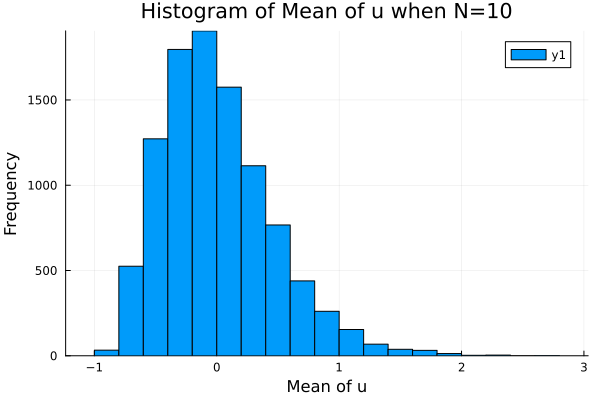

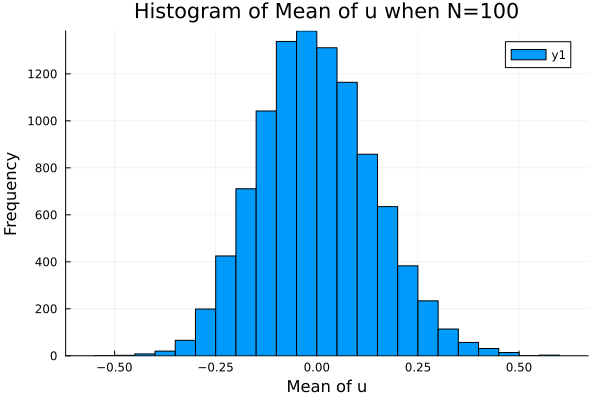

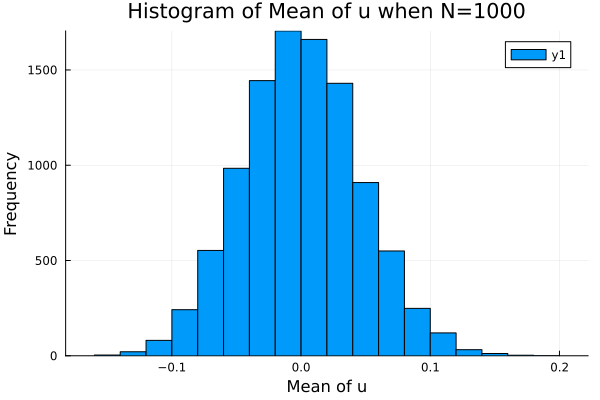

In [40]:
# Plot the histogram of the mean variable
hist_10=histogram(df_10.mean_vals, bins=30, title="Histogram of Mean of u when N=10", xlabel="Mean of u", ylabel="Frequency")
hist_100=histogram(df_100.mean_vals, bins=30, title="Histogram of Mean of u when N=100", xlabel="Mean of u", ylabel="Frequency")
hist_1000=histogram(df_1000.mean_vals, bins=30, title="Histogram of Mean of u when N=1000", xlabel="Mean of u", ylabel="Frequency") 
display(hist_10)
display(hist_100)
display(hist_1000)

As $N$ gets larger, the mean gets closer to 0 and the spreads get narrower; the distribution becomes more like a normal distribution as the Central Limit Theorem takes effect.

6. Set up a program or function that does the following for $N = 10$:

    (a) Clear all variables and set number of observations to $N$

    (b) Generate $x_1, x_2, u, y$ where $y = 1 + 2x_1 + 10x_2 + u$

    (c) Regress $y$ on $x_1, x_2$

    (d) Retrieve regression coefficients and standard deviations (6 scalars in total)

Simulate the program 10 000 times



In [ ]:
function f(N)
    x_1 = rand(N)
    x_2 = rand(Binomial(1, 0.3), N)
    u_plus_1 = rand(Chisq(1), N)
    u = u_plus_1 .- 1
    y=1+2x_1+10x_2+u
    model = lm(@formula(y ~ x_1+x_2), df)
end